In [164]:
%matplotlib inline

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression

# Regression models

## Linear regression 

It predicts a continuous variable that is linear (the data is shaped like a straight line). Given the data: (x; y) and I create a model. The assumption that y depends linearly on x: y = ax + b. I have to find coeff: a and b, of the straight line that best describes these data. In reality, the data often have errors (random noise - ε). \
y = ax + b + ε

In [166]:
# linear function:
x = np.linspace(-3, 5, 300)
y = 2 * x + 3

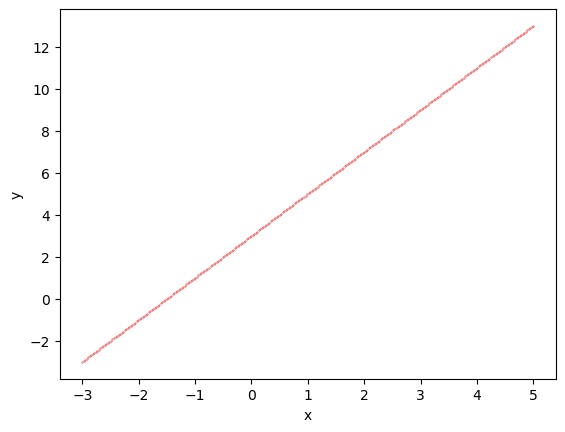

In [167]:
plt.scatter(x, y , color= "r", s = 0.1)

plt.xlabel("x")
plt.ylabel("y")

plt.show()

In [168]:
# usually the inputs (x) are well known and there is no need for noise
# noise for outputs (y):
y_noise = np.random.normal(loc = 0, scale = 0.7, size = len(x)) # loc - mean; scale - std
y += y_noise

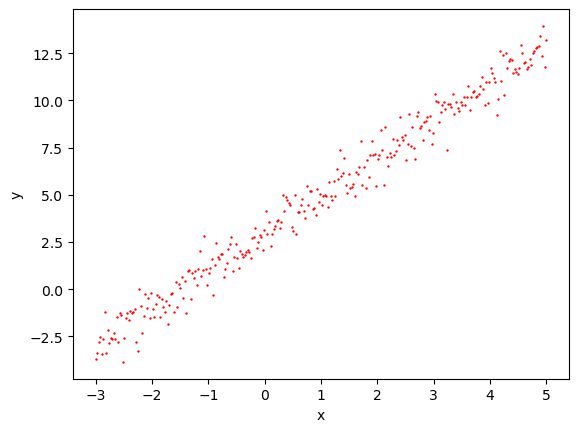

In [169]:
plt.scatter(x, y_result , color= "r", s = 0.5)

plt.xlabel("x")
plt.ylabel("y")

plt.show()

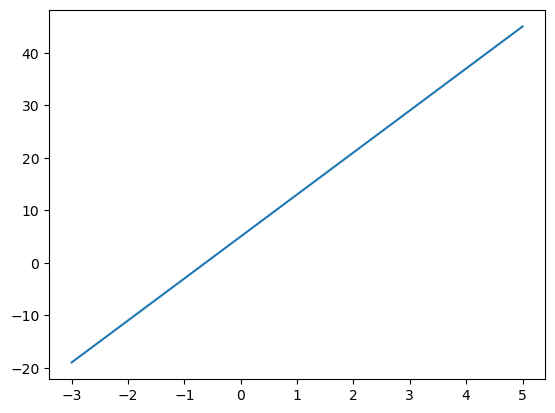

In [57]:
a = 8
b = 5 

model_x = np.linspace(np.min(x), np.max(x), 5)
model_y = a * model_x + b

plt.plot(model_x, model_y)
plt.show()

I imagine I don't know what the linear function is and try to predict it:

In [170]:
def plot_predictions(x, y, a, b):
    y_predictions = a * x + b

    plt.scatter(x, y, color = "r", s = 0.5, label = "data")
    plt.plot(x, y_predictions, label = "model")
    
    plt.xlabel("x")
    plt.ylabel("y")

    plt.legend()
    plt.show()

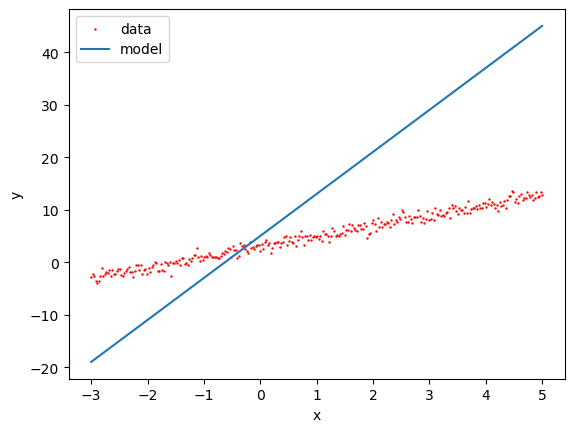

In [59]:
plot_predictions(x, y, a, b)

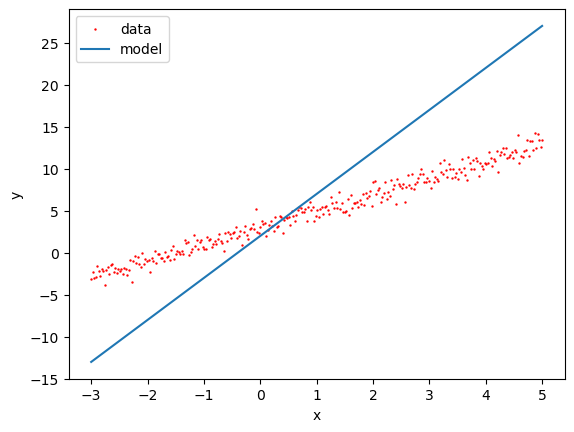

In [171]:
a = 5
b = 2
plot_predictions(x, y, a, b)

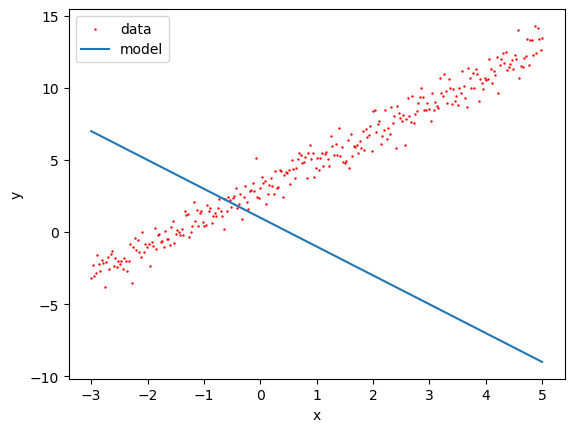

In [172]:
a = -2
b = 1
plot_predictions(x, y, a, b)
# bad model

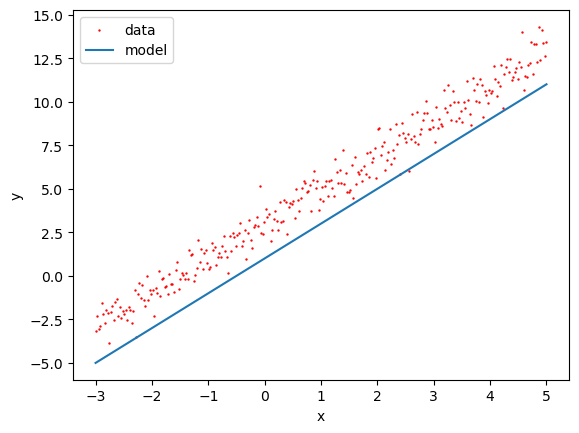

In [173]:
a = 2
b = 1
plot_predictions(x, y, a, b)

# good model but it has systematic error:

Which model goes best between the points? That is the one that has the smallest distance to the points. It can be a straight line, it can be a curve. \
The distance (perpendicular from the point to the line) must be minimal. But I can use the gray lines, not the real distances (the red ones), because I'm not looking for the distance itself, but when it's minimal (under what conditions). The function is monotonically decreasing the minima are in the same place. The minimum found by the red lines will be the same as the minimum found by the gray lines. Red distance * cos a = gray distance. Tthe minimum found by the red lines will be the same as the minimum found by the gray lines.

<img src="distances.jpg" width="500" height="500">

In [201]:
# calculation of absolute error:

def compute_cost(x, y, a, b):
    y_predictions = a * x + b
    # distances = np.abs(y - y_predictions)

    # Mean squared error (more sensitive to outliers):
    distances = (y - y_predictions) ** 2
    
    # Absolute error:
    total_distances = np.sum(distances)

    # Mean absolute error: 
    mean_distance = np.mean(distances)
    
    return mean_distance

In [110]:
compute_cost(x, y, 8, 5)

259.1737335408554

In [111]:
compute_cost(x, y, 5, 2)

53.325333459278575

In [112]:
compute_cost(x, y, 2, 1)

4.310376634855777

In [113]:
compute_cost(x, y, 2, 3)

0.501679423782324

Тhe best model is the one with the smallest error. I'm looking for arguments (x, y, a, b) where the error function (**Total cost function**) is minimal! But x, y are constants, so a = ? , b = ?

In Linear regression - derivative = 0.

**Gradient descent** – ​​an algorithm that is used to minimize an error function (total cost function - J). The goal of the algorithm is to find the best model parameters (a, b) that minimize the value of the error function. Gradient of the total cost function is a vector of derivatives. Large vectors indicate that the function in this part is very steep, and small vectors indicate a local minimum / maximum. The direction of the vectors indicates where the function grows the most. I'm looking for where the function decreases the most, so I take -gradient (minus gradient). \
I have a point of the function (a, b), I calculate the distances and get a number, I take the derivatives of the cost function, they say which direction to go so that these distances are the greatest and I go in the opposite direction (to make these distances smallest). I take a step, get new a and b - a new model that will have smaller distances.

In [208]:
def compute_gradient(x, y, a, b):
    predictions = a * x + b
    a_gradient = -2 / len(x) * np.sum(x * (y - predictions))
    b_gradient = -2 / len(x) * np.sum(y - predictions)
    
    return np.array([a_gradient, b_gradient])

In [209]:
compute_gradient(x, y, 5, 1) # get different vectors

array([34.54309366,  2.0422671 ])

In [210]:
# multiply by learning rate to make smaller steps:
learning_rate = 0.01
a = 5
b = 1

In [211]:
compute_cost(x, y, a, b)

50.75458789309345

In [212]:
# new points:
a = a - learning_rate * compute_gradient(x, y, a, b)[0]
b = b - learning_rate * compute_gradient(x, y, a, b)[1]
a, b

(4.654569063387422, 0.9864859476893162)

In [213]:
compute_cost(x, y, a, b)

39.56422050209228

In [214]:
# new points:
a = a - learning_rate * compute_gradient(x, y, a, b)[0]
b = b - learning_rate * compute_gradient(x, y, a, b)[1]
a, b

(4.35340945444018, 0.9792653686037909)

In [215]:
compute_cost(x, y, a, b)

31.06699855825739

In [216]:
# new points:
a = a - learning_rate * compute_gradient(x, y, a, b)[0]
b = b - learning_rate * compute_gradient(x, y, a, b)[1]

In [217]:
compute_cost(x, y, a, b)

24.60736424517824

In [218]:
# new points:
a = a - learning_rate * compute_gradient(x, y, a, b)[0]
b = b - learning_rate * compute_gradient(x, y, a, b)[1]
a, b

(3.8615958737676235, 0.980238835971421)

In [219]:
compute_cost(x, y, a, b)

19.689617386414653

At each step the distances get smaller (the model gets better). This is **gradient descent** , but it is make with for loop.

In [221]:
for step in range(1000):
    a = a - learning_rate * compute_gradient(x, y, a, b)[0]
    b = b - learning_rate * compute_gradient(x, y, a, b)[1]

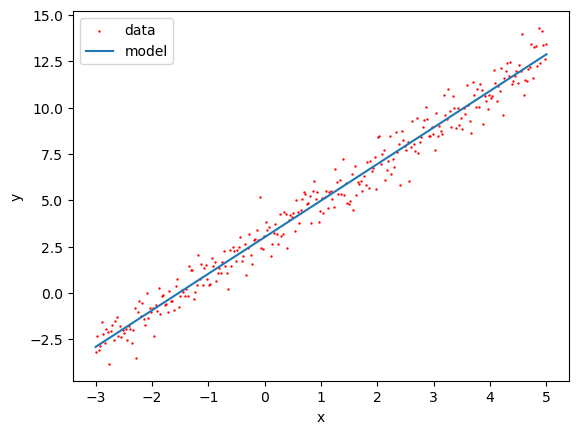

In [222]:
plot_predictions(x, y, a, b)
plt.show()

In [230]:
a, b

(1.9732930671728974, 3.0055732652252285)

In [227]:
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

LinearRegression()

Approximations:

In [228]:
# it is very close to real a (1.9732930671728974)
model.coef_

array([1.97329304])

In [231]:
# it is very close to real b (3.0055732652252285)
model.intercept_

3.0055734060755057

In [232]:
model.predict(x.reshape(-1, 1))

array([-2.91430572e+00, -2.86150858e+00, -2.80871144e+00, -2.75591430e+00,
       -2.70311717e+00, -2.65032003e+00, -2.59752289e+00, -2.54472575e+00,
       -2.49192861e+00, -2.43913148e+00, -2.38633434e+00, -2.33353720e+00,
       -2.28074006e+00, -2.22794292e+00, -2.17514578e+00, -2.12234865e+00,
       -2.06955151e+00, -2.01675437e+00, -1.96395723e+00, -1.91116009e+00,
       -1.85836295e+00, -1.80556582e+00, -1.75276868e+00, -1.69997154e+00,
       -1.64717440e+00, -1.59437726e+00, -1.54158012e+00, -1.48878299e+00,
       -1.43598585e+00, -1.38318871e+00, -1.33039157e+00, -1.27759443e+00,
       -1.22479730e+00, -1.17200016e+00, -1.11920302e+00, -1.06640588e+00,
       -1.01360874e+00, -9.60811604e-01, -9.08014466e-01, -8.55217328e-01,
       -8.02420190e-01, -7.49623051e-01, -6.96825913e-01, -6.44028775e-01,
       -5.91231637e-01, -5.38434498e-01, -4.85637360e-01, -4.32840222e-01,
       -3.80043084e-01, -3.27245945e-01, -2.74448807e-01, -2.21651669e-01,
       -1.68854531e-01, -

## Logistic regression

Logistic regression – for classification. Classification gives 1 of several classes. Here the cost function must be different - **sigmoid function** is used: $ S = \frac{1}{(1 + e^{-x})} $ \
I have a linear function (L) whose result I feed to the sigmoid function: S(L(x)). So I will only get numbers between 0 and 1. \
This number between 0 and 1 can be interpreted as a probability - the probability that a given class is a class 1 (I have 0.8 - 80% a given class is 1, so it is more likely to be 1, if I have 20% - then class is more likely to be 0).

In [252]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [253]:
y = sigmoid(a * x + b)

In [254]:
x = np.linspace(-5, 5, 20)
y = (x >= 3).astype(int)

In [255]:
classification_model = LogisticRegression()

In [256]:
classification_model.fit(x.reshape(-1, 1), y)

LogisticRegression()

In [257]:
classification_model.predict(x.reshape(-1, 1))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [258]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

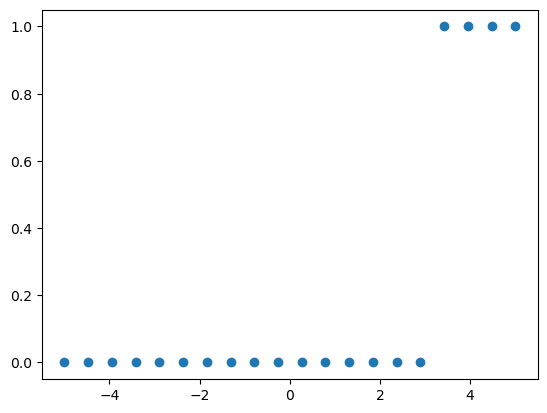

In [259]:
plt.scatter(x, y)
plt.show()

In [260]:
classification_model.coef_

array([[1.40495051]])

In [261]:
classification_model.intercept_

array([-4.48884031])

In [263]:
predictions = classification_model.predict_proba(x.reshape(-1, 1))

In [265]:
np.argmax(predictions, axis = 1) 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
      dtype=int64)

## Quiz:

In [275]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = pd.DataFrame(data, columns=feature_names)
y = pd.Series(target, name='PRICE')

model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_

# Create a Series for the coefficients with feature names
feature_coefficients = pd.Series(coefficients, index=feature_names)

# Print the coefficient related to the number of rooms (RM)
print(f"Coefficients:\n{feature_coefficients}")
print(f"Coefficient related to the number of rooms (RM): {feature_coefficients['RM']:.2f}")

Coefficients:
CRIM       -0.108011
ZN          0.046420
INDUS       0.020559
CHAS        2.686734
NOX       -17.766611
RM          3.809865
AGE         0.000692
DIS        -1.475567
RAD         0.306049
TAX        -0.012335
PTRATIO    -0.952747
B           0.009312
LSTAT      -0.524758
dtype: float64
Coefficient related to the number of rooms (RM): 3.81


In [271]:
intercept = model.intercept_

print(f"Price of a hypothetical house with all variables set to zero is {intercept:.2f}")

Price of a hypothetical house with all variables set to zero is 36.46


In [272]:
from sklearn.metrics import r2_score

y_pred = model.predict(X)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y, y_pred)

print(f"Coefficient of determination (R^2) is {r2:.2f}")

Coefficient of determination (R^2) is 0.74
